# EDA in Pandas

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("world_population.csv")
df.head(2)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.00,38972230.00,33753499.00,28189672.00,19542982.00,10694796.00,12486631.00,10752971.00,652230.00,63.06,1.03,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.00,2866849.00,2882481.00,2913399.00,3182021.00,3295066.00,2941651.00,2324731.00,28748.00,98.87,1.00,0.04


In [15]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # 2 decimal place

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

In [28]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rank,234.00,117.50,67.69,1.00,59.25,117.50,175.75,234.00
2022 Population,230.00,34632250.88,137889172.44,510.00,419738.50,5762857.00,22653719.00,1425887337.00
2020 Population,233.00,33600710.95,135873196.61,520.00,406471.00,5456681.00,21522626.00,1424929781.00
2015 Population,230.00,32066004.16,131507146.34,564.00,394295.00,5244415.00,19730853.75,1393715448.00
2010 Population,227.00,30270164.48,126074183.54,596.00,382726.50,4889741.00,16825852.50,1348191368.00
2000 Population,227.00,26840495.26,113352454.57,651.00,329470.00,4491202.00,15625467.00,1264099069.00
1990 Population,229.00,19330463.93,81309624.96,700.00,261928.00,3785847.00,11882762.00,1153704252.00
1980 Population,229.00,16282884.78,69345465.54,733.00,223752.00,3135123.00,9817257.00,982372466.00
1970 Population,230.00,15866499.13,68355859.75,752.00,145880.50,2511718.00,8817329.00,822534450.00
Area (km²),232.00,581663.75,1769133.06,1.00,2567.25,77141.00,414643.25,17098242.00


In [18]:
df.isnull().sum() #identify missing values

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                4
2020 Population                1
2015 Population                4
2010 Population                7
2000 Population                7
1990 Population                5
1980 Population                5
1970 Population                4
Area (km²)                     2
Density (per km²)              4
Growth Rate                    2
World Population Percentage    0
dtype: int64

In [19]:
df.nunique() #unique values in each column

Rank                           234
CCA3                           234
Country                        234
Capital                        234
Continent                        6
2022 Population                230
2020 Population                233
2015 Population                230
2010 Population                227
2000 Population                227
1990 Population                229
1980 Population                229
1970 Population                230
Area (km²)                     231
Density (per km²)              230
Growth Rate                    178
World Population Percentage     70
dtype: int64

In [20]:
df.sort_values(by="World Population Percentage", ascending=False).head(10)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337.00,1424929781.00,1393715448.00,1348191368.00,1264099069.00,1153704252.00,982372466.00,822534450.00,9706961.00,146.89,1.00,17.88
92,2,IND,India,New Delhi,Asia,1417173173.00,1396387127.00,1322866505.00,1240613620.00,1059633675.00,NaN,NaN,557501301.00,3287590.00,431.07,1.01,17.77
221,3,USA,United States,"Washington, D.C.",North America,338289857.00,335942003.00,324607776.00,311182845.00,282398554.00,248083732.00,223140018.00,200328340.00,9372610.00,36.09,1.00,4.24
93,4,IDN,Indonesia,Jakarta,Asia,275501339.00,271857970.00,259091970.00,244016173.00,214072421.00,182159874.00,148177096.00,115228394.00,1904569.00,144.65,1.01,3.45
156,5,PAK,Pakistan,Islamabad,Asia,235824862.00,227196741.00,210969298.00,194454498.00,154369924.00,115414069.00,80624057.00,59290872.00,881912.00,267.40,1.02,2.96
149,6,NGA,Nigeria,Abuja,Africa,218541212.00,208327405.00,183995785.00,160952853.00,122851984.00,95214257.00,72951439.00,55569264.00,923768.00,236.58,1.02,2.74
27,7,BRA,Brazil,Brasilia,South America,215313498.00,213196304.00,205188205.00,196353492.00,175873720.00,150706446.00,122288383.00,96369875.00,8515767.00,25.28,1.00,2.70
16,8,BGD,Bangladesh,Dhaka,Asia,171186372.00,167420951.00,157830000.00,148391139.00,129193327.00,107147651.00,83929765.00,67541860.00,147570.00,1160.04,1.01,2.15
171,9,RUS,Russia,Moscow,Europe,144713314.00,145617329.00,144668389.00,143242599.00,146844839.00,148005704.00,138257420.00,130093010.00,17098242.00,8.46,1.00,1.81
131,10,MEX,Mexico,Mexico City,North America,127504125.00,125998302.00,120149897.00,112532401.00,97873442.00,81720428.00,67705186.00,50289306.00,1964375.00,64.91,1.01,1.60


In [31]:
df.sort_values(by="2022 Population", ascending=False).head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337.00,1424929781.00,1393715448.00,1348191368.00,1264099069.00,1153704252.00,982372466.00,822534450.00,9706961.00,146.89,1.00,17.88
92,2,IND,India,New Delhi,Asia,1417173173.00,1396387127.00,1322866505.00,1240613620.00,1059633675.00,NaN,NaN,557501301.00,3287590.00,431.07,1.01,17.77
221,3,USA,United States,"Washington, D.C.",North America,338289857.00,335942003.00,324607776.00,311182845.00,282398554.00,248083732.00,223140018.00,200328340.00,9372610.00,36.09,1.00,4.24
93,4,IDN,Indonesia,Jakarta,Asia,275501339.00,271857970.00,259091970.00,244016173.00,214072421.00,182159874.00,148177096.00,115228394.00,1904569.00,144.65,1.01,3.45
156,5,PAK,Pakistan,Islamabad,Asia,235824862.00,227196741.00,210969298.00,194454498.00,154369924.00,115414069.00,80624057.00,59290872.00,881912.00,267.40,1.02,2.96


In [36]:
# Calculate correlation only for numeric columns
# df.corr()
correlation_matrix = df.select_dtypes(include=['number']).corr()
print(correlation_matrix)


                             Rank  2022 Population  2020 Population  \
Rank                         1.00            -0.36            -0.36   
2022 Population             -0.36             1.00             1.00   
2020 Population             -0.36             1.00             1.00   
2015 Population             -0.35             1.00             1.00   
2010 Population             -0.35             1.00             1.00   
2000 Population             -0.34             0.99             1.00   
1990 Population             -0.33             0.99             0.99   
1980 Population             -0.33             0.99             0.99   
1970 Population             -0.34             0.97             0.98   
Area (km²)                  -0.38             0.45             0.45   
Density (per km²)            0.13            -0.03            -0.03   
Growth Rate                 -0.22            -0.02            -0.03   
World Population Percentage -0.36             1.00             1.00   

     

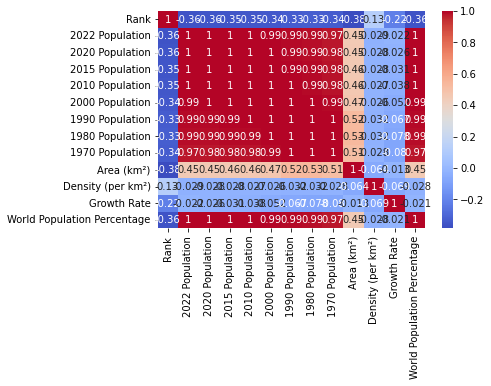

In [37]:
sns.heatmap(df.corr(), annot = True)

plt.rcParams['figure.figsize'] = (20,7)

plt.show()

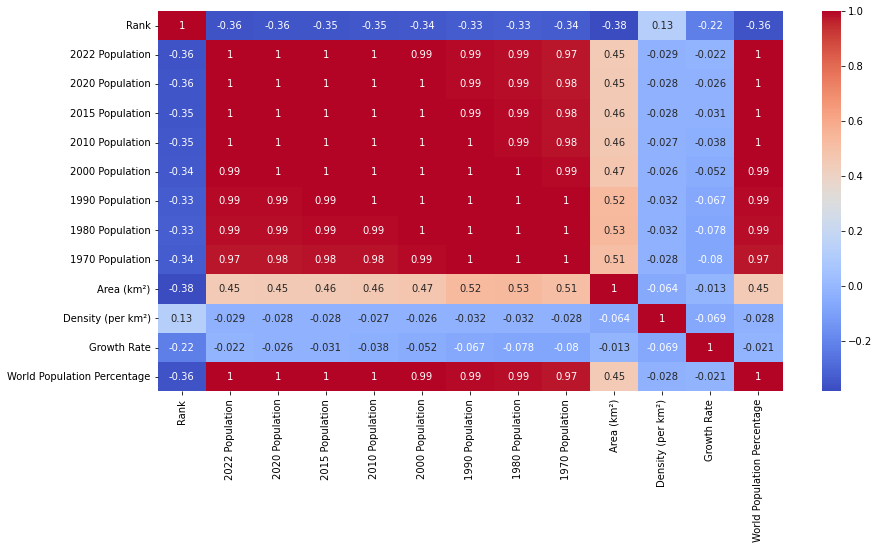

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(14,7))

# Plot the correlation heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

# plt.gcf().set_size_inches(20, 7)

plt.show()

In [45]:
df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.00,38972230.00,33753499.00,28189672.00,19542982.00,10694796.00,12486631.00,10752971.00,652230.00,63.06,1.03,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.00,2866849.00,2882481.00,2913399.00,3182021.00,3295066.00,2941651.00,2324731.00,28748.00,98.87,1.00,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.00,43451666.00,39543154.00,35856344.00,30774621.00,25518074.00,18739378.00,13795915.00,2381741.00,18.85,1.02,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.00,46189.00,51368.00,54849.00,58230.00,47818.00,32886.00,27075.00,199.00,222.48,0.98,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.00,77700.00,71746.00,71519.00,66097.00,53569.00,35611.00,19860.00,468.00,170.56,1.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572.00,11655.00,12182.00,13142.00,14723.00,13454.00,11315.00,9377.00,142.00,81.49,1.00,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986.00,556048.00,491824.00,413296.00,270375.00,178529.00,116775.00,76371.00,266000.00,2.17,1.02,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614.00,32284046.00,28516545.00,24743946.00,18628700.00,13375121.00,9204938.00,6843607.00,527968.00,63.82,1.02,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675.00,18927715.00,NaN,13792086.00,9891136.00,7686401.00,5720438.00,4281671.00,752612.00,26.60,1.03,0.25


In [ ]:
# df.groupby('Continent').mean().sort_values(by="2022 Population",ascending=False)

In [48]:
import pandas as pd

# Select only numeric columns for the mean calculation
numeric_df = df.select_dtypes(include=['number'])

# Group by 'Continent' and calculate the mean for numeric columns only
grouped_mean = numeric_df.groupby(df['Continent']).mean()

# Sort the results by '2022 Population' in descending order
sorted_grouped_mean = grouped_mean.sort_values(by='2022 Population', ascending=False)
print(sorted_grouped_mean)


                Rank  2022 Population  2020 Population  2015 Population  \
Continent                                                                 
Asia           77.56      96327387.31      94955134.37      89165003.64   
South America  97.57      31201186.29      30823574.50      29509599.71   
Africa         92.16      25455879.68      23871435.26      21419703.57   
Europe        124.50      15055371.82      14915843.92      15027454.12   
North America 160.93      15007403.40      14855914.82      14259596.25   
Oceania       188.52       2046386.32       1910148.96       1756664.48   

               2010 Population  2000 Population  1990 Population  \
Continent                                                          
Asia               89087770.00      80580835.11      48639995.33   
South America      26789395.54      25015888.69      21224743.93   
Africa             18898197.31      14598365.95      11376964.52   
Europe             14712278.68      14817685.71      147852

In [52]:
sorted_grouped_mean.transpose()

Continent,Asia,South America,Africa,Europe,North America,Oceania
Rank,77.56,97.57,92.16,124.50,160.93,188.52
2022 Population,96327387.31,31201186.29,25455879.68,15055371.82,15007403.40,2046386.32
2020 Population,94955134.37,30823574.50,23871435.26,14915843.92,14855914.82,1910148.96
2015 Population,89165003.64,29509599.71,21419703.57,15027454.12,14259596.25,1756664.48
2010 Population,89087770.00,26789395.54,18898197.31,14712278.68,13568016.28,1613163.65
2000 Population,80580835.11,25015888.69,14598365.95,14817685.71,12151739.60,1357512.09
1990 Population,48639995.33,21224743.93,11376964.52,14785203.94,10531660.62,1162774.87
1980 Population,40278333.33,17270643.29,8586031.98,14200004.52,9207334.03,996532.17
1970 Population,43839877.83,13781939.71,6567175.27,13118479.82,7885865.15,846968.26
Area (km²),642762.82,1301302.85,537879.30,460208.22,606104.45,370220.91


<AxesSubplot:xlabel='Continent'>

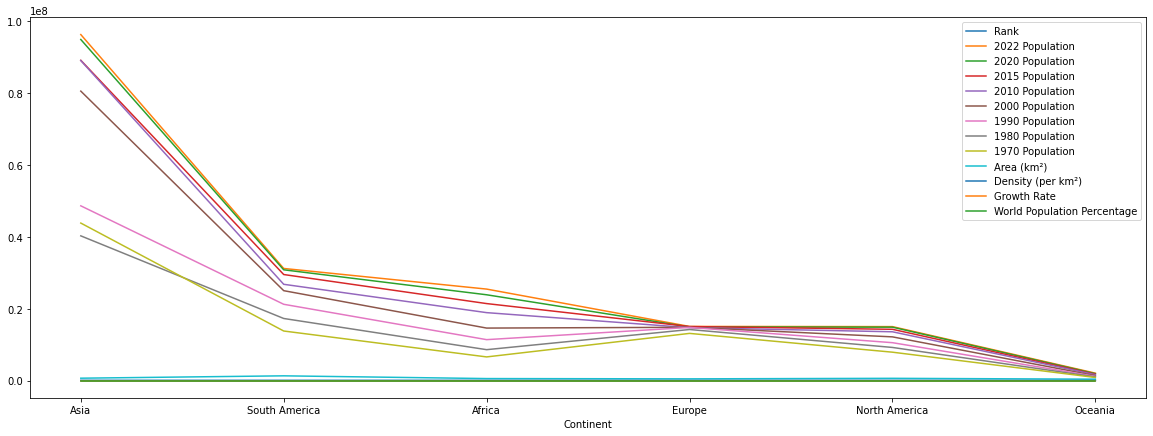

In [53]:
sorted_grouped_mean.plot()

In [49]:
df[df['Continent'].str.contains('Oceania')]

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.00,46189.00,51368.00,54849.00,58230.00,47818.00,32886.00,27075.00,199.00,222.48,0.98,0.00
11,55,AUS,Australia,Canberra,Oceania,26177413.00,25670051.00,23820236.00,22019168.00,19017963.00,17048003.00,14706322.00,12595034.00,7692024.00,3.40,1.01,0.33
44,223,COK,Cook Islands,Avarua,Oceania,17011.00,17029.00,17695.00,17212.00,15897.00,17123.00,17651.00,20470.00,236.00,72.08,1.00,0.00
66,162,FJI,Fiji,Suva,Oceania,929766.00,920422.00,917200.00,905169.00,832509.00,780430.00,644582.00,527634.00,18272.00,50.88,1.01,0.01
70,183,PYF,French Polynesia,Papeete,Oceania,306279.00,301920.00,291787.00,283788.00,250927.00,211089.00,163591.00,117891.00,4167.00,73.50,1.01,0.00
81,191,GUM,Guam,Hagåtña,Oceania,171774.00,169231.00,167978.00,164905.00,160188.00,138263.00,110286.00,88300.00,549.00,312.89,1.01,0.00
107,192,KIR,Kiribati,Tarawa,Oceania,131232.00,126463.00,116707.00,107995.00,88826.00,75124.00,60813.00,57437.00,811.00,161.81,1.02,0.00
126,215,MHL,Marshall Islands,Majuro,Oceania,41569.00,43413.00,49410.00,53416.00,54224.00,46047.00,31988.00,23969.00,181.00,229.66,0.99,0.00
132,194,FSM,Micronesia,Palikir,Oceania,114164.00,112106.00,109462.00,107588.00,111709.00,98603.00,76299.00,58989.00,702.00,162.63,1.01,0.00
142,225,NRU,Nauru,Yaren,Oceania,12668.00,12315.00,11185.00,10241.00,10377.00,9598.00,7635.00,6663.00,21.00,603.24,1.01,0.00


In [54]:
df2 = df.groupby('Continent')[['1970 Population',
       '1980 Population', '1990 Population', '2000 Population',
       '2010 Population', '2015 Population', '2020 Population',
       '2022 Population']].mean().sort_values(by="2022 Population",ascending=False)
df2

,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population,2015 Population,2020 Population,2022 Population
Continent,,,,,,,,
Asia,43839877.83,40278333.33,48639995.33,80580835.11,89087770.00,89165003.64,94955134.37,96327387.31
South America,13781939.71,17270643.29,21224743.93,25015888.69,26789395.54,29509599.71,30823574.50,31201186.29
Africa,6567175.27,8586031.98,11376964.52,14598365.95,18898197.31,21419703.57,23871435.26,25455879.68
Europe,13118479.82,14200004.52,14785203.94,14817685.71,14712278.68,15027454.12,14915843.92,15055371.82
North America,7885865.15,9207334.03,10531660.62,12151739.60,13568016.28,14259596.25,14855914.82,15007403.40
Oceania,846968.26,996532.17,1162774.87,1357512.09,1613163.65,1756664.48,1910148.96,2046386.32


In [55]:
df.columns

Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

In [56]:
df3 = df2.transpose()
df3

Continent,Asia,South America,Africa,Europe,North America,Oceania
1970 Population,43839877.83,13781939.71,6567175.27,13118479.82,7885865.15,846968.26
1980 Population,40278333.33,17270643.29,8586031.98,14200004.52,9207334.03,996532.17
1990 Population,48639995.33,21224743.93,11376964.52,14785203.94,10531660.62,1162774.87
2000 Population,80580835.11,25015888.69,14598365.95,14817685.71,12151739.60,1357512.09
2010 Population,89087770.00,26789395.54,18898197.31,14712278.68,13568016.28,1613163.65
2015 Population,89165003.64,29509599.71,21419703.57,15027454.12,14259596.25,1756664.48
2020 Population,94955134.37,30823574.50,23871435.26,14915843.92,14855914.82,1910148.96
2022 Population,96327387.31,31201186.29,25455879.68,15055371.82,15007403.40,2046386.32


<AxesSubplot:>

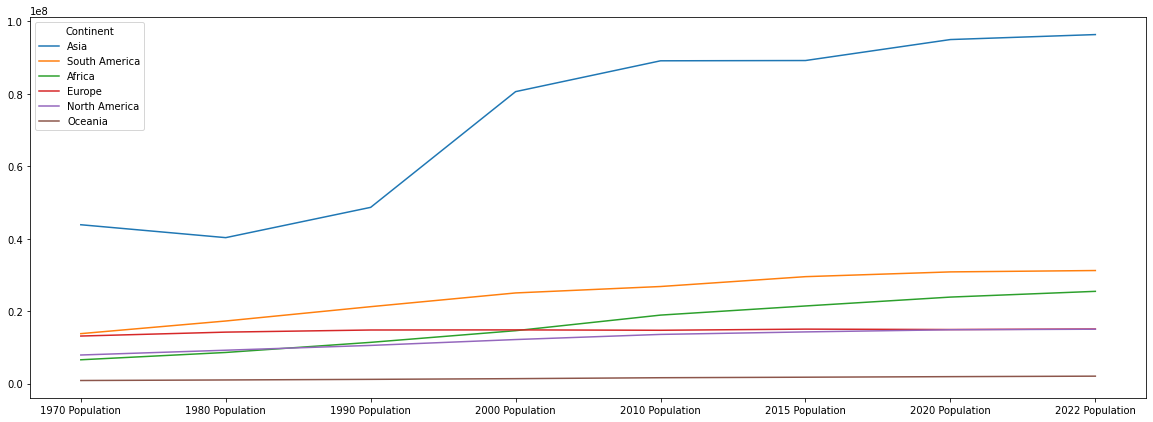

In [57]:
df3.plot()

<AxesSubplot:>

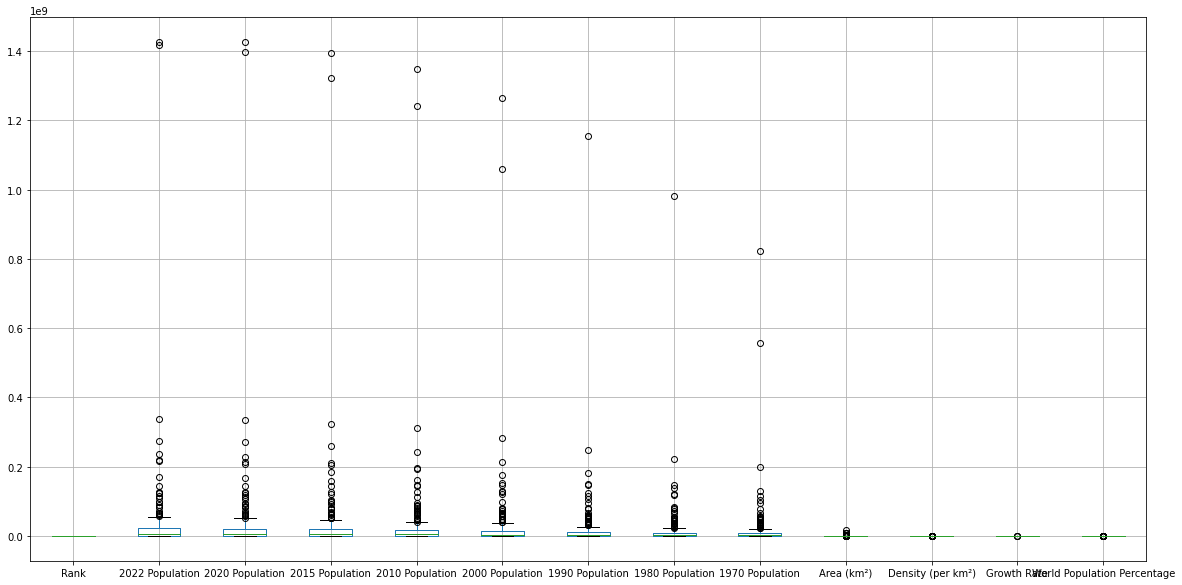

In [58]:
df.boxplot(figsize=(20,10)) # outliers were detected

In [59]:
df.select_dtypes(include='float')

,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,41128771.00,38972230.00,33753499.00,28189672.00,19542982.00,10694796.00,12486631.00,10752971.00,652230.00,63.06,1.03,0.52
1,2842321.00,2866849.00,2882481.00,2913399.00,3182021.00,3295066.00,2941651.00,2324731.00,28748.00,98.87,1.00,0.04
2,44903225.00,43451666.00,39543154.00,35856344.00,30774621.00,25518074.00,18739378.00,13795915.00,2381741.00,18.85,1.02,0.56
3,44273.00,46189.00,51368.00,54849.00,58230.00,47818.00,32886.00,27075.00,199.00,222.48,0.98,0.00
4,79824.00,77700.00,71746.00,71519.00,66097.00,53569.00,35611.00,19860.00,468.00,170.56,1.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
229,11572.00,11655.00,12182.00,13142.00,14723.00,13454.00,11315.00,9377.00,142.00,81.49,1.00,0.00
230,575986.00,556048.00,491824.00,413296.00,270375.00,178529.00,116775.00,76371.00,266000.00,2.17,1.02,0.01
231,33696614.00,32284046.00,28516545.00,24743946.00,18628700.00,13375121.00,9204938.00,6843607.00,527968.00,63.82,1.02,0.42
232,20017675.00,18927715.00,NaN,13792086.00,9891136.00,7686401.00,5720438.00,4281671.00,752612.00,26.60,1.03,0.25


In [60]:
df.select_dtypes(include='object')

,CCA3,Country,Capital,Continent
0,AFG,Afghanistan,Kabul,Asia
1,ALB,Albania,Tirana,Europe
2,DZA,Algeria,Algiers,Africa
3,ASM,American Samoa,Pago Pago,Oceania
4,AND,Andorra,Andorra la Vella,Europe
...,...,...,...,...
229,WLF,Wallis and Futuna,Mata-Utu,Oceania
230,ESH,Western Sahara,El Aaiún,Africa
231,YEM,Yemen,Sanaa,Asia
232,ZMB,Zambia,Lusaka,Africa
